# Programacion de Modelos

#### Ejemplo de random forest
https://medium.com/@maryamuzakariya/project-predict-stock-prices-using-random-forest-regression-model-in-python-fbe4edf01664#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6Ijk2OTcxODA4Nzk2ODI5YTk3MmU3OWE5ZDFhOWZmZjExY2Q2MWIxZTMiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2ODE4Mzc2MjgsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNDE3NDU1NzAzMzgwMTkyMzE4MyIsImVtYWlsIjoibWFydGluLnJpdmVyYXI4NEBnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6Ik1hcnTDrW4gcml2ZXJhIiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FHTm15eFkyeUtDNGZuY1JfU1VKa3YxaXM3TU5pOVdxMFd2T2RPNl9LZlZXYlE9czk2LWMiLCJnaXZlbl9uYW1lIjoiTWFydMOtbiIsImZhbWlseV9uYW1lIjoicml2ZXJhIiwiaWF0IjoxNjgxODM3OTI4LCJleHAiOjE2ODE4NDE1MjgsImp0aSI6IjIyN2VkODJkYzdiNTdjMGVhOGQ0YTY5MDExMjQ0NDM0ZTdhNGIyNWIifQ.TpiJ0jRzgAAw-yuLG5M09jHuuQm4zzuWOWGkv4cTkcO12ZqPUvxMcdR-i-adc_7NOVea3WbD6LDAl6Lc2zEuGMWY7iblBktreeC6yWnPQ-ZX_tZJmZax3pf1I11MbbH8HkpgE-u8gNswnJkyvwP4EVnXtYkhXzBCvChxbapFrzL4QNENAqCGXsBMsowgWmS-2tmDywN_jxRrbrb_4B1fpfrVkSwTlBh9-hqRGyDUEgV-mAPltkZpeGU6IAo8QO4EVdOpUjO608J_EzNVqgY0U99YUj4H9Kp8yTibewJmej55Rk9ZfFIfo7TiftK9vcQLUmPdX17Z36yc7vr5qKwNPA

### Descargo los paquetes

In [389]:
!pip install yfinance

In [390]:
# Llamo a las bibliotecas genericas

import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing


# Forecast con Random Forest con datos de webscraping

### Preparo los datos

In [438]:
# Descarga y limpieza de datos
ventas_scraping = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

# Se elimina outlier de Km
ventas_scraping = ventas_scraping[(ventas_scraping['Km'] < 200000)]

# Se elimina outliers de Precio
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] > 50000)]
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] < 900000)]

# Se convierte Año en ambos sets de datos de Entero a objeto
ventas_scraping['Año']= ventas_scraping['Año'].astype(str)
ventas_scraping['Año']= "01/01/"+ventas_scraping['Año']

# Formateo campo de Año de Str a Datetime
ventas_scraping['Año'] = pd.to_datetime(ventas_scraping.Año, format='%m/%d/%Y')

# Selecciono las columnas para el modelaje
ventas_scraping = ventas_scraping[['Marcas', 'Modelos', 'Año', 'Año_Modelo_Diff', 'Km', 'Precio MXN']]

# Selecciono los 6 modelos modelos de las marcas de las 3 marcas mas populares
ventas_scraping = ventas_scraping[ventas_scraping['Modelos'].isin(['Aveo', 'Trax', 'Versa', 'Sentra', 'Jetta', 'Vento'])]

# Declaro Año como Index
ventas_scraping.set_index("Año", inplace=True)

ventas_scraping.head()

,Marcas,Modelos,Año_Modelo_Diff,Km,Precio MXN
Año,,,,,
2020-01-01,Chevrolet,Aveo,2,19440,212700
2018-01-01,Chevrolet,Aveo,4,50000,165000
2018-01-01,Chevrolet,Aveo,4,30000,197600
2019-01-01,Chevrolet,Aveo,3,15697,200800
2018-01-01,Chevrolet,Aveo,4,44769,180000


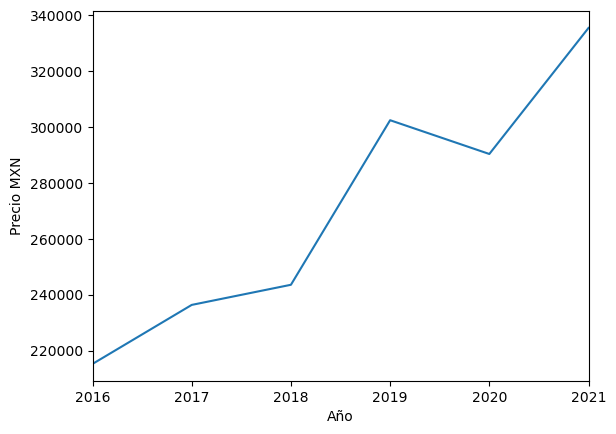

In [439]:
#Data
vs = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

vs = vs[vs['Modelos'].isin(['Aveo', 'Trax', 'Versa', 'Sentra', 'Jetta', 'Vento'])]

vs['Año']= vs['Año'].astype(str)
vs['Año']= "01/01/"+vs['Año']
vs['Año'] = pd.to_datetime(vs.Año, format='%m/%d/%Y')
#vs.set_index("Año", inplace=True)

precio_mean = vs.groupby([(vs.Año)]).mean()
#precio_mean = vs.groupby(['Año'],as_index=False).mean()
precio_mean.head()

#Grafico
precio_mean['Precio MXN'].plot()
plt.ylabel("Precio MXN")
plt.show()

In [440]:
precio_mean.head()

,Año_Modelo_Diff,Km,Precio MXN
Año,,,
2016-01-01,6.0,86315.723684,215240.236842
2017-01-01,5.0,75111.858065,236365.045161
2018-01-01,4.0,59649.664773,243567.596591
2019-01-01,3.0,51654.931034,302466.991379
2020-01-01,2.0,43592.570552,290381.914110


In [441]:
vs = pd.read_excel('Webscraping Data Entrenamiento.xlsx')
vs = vs[vs['Modelos'].isin(['Aveo', 'Trax', 'Versa', 'Sentra', 'Jetta', 'Vento'])]

vs['Año']= vs['Año'].astype(int)
vs.set_index("Año", inplace=False)
vs.head()


,Marcas,Modelos,Año,Año_Modelo_Diff,Km,Ciudad de Venta,Precio MXN,hash
0,Chevrolet,Aveo,2020,2,19440,Tlalpan,212700,Chevrolet_Aveo_2020_19440_Tlalpan_212700
1,Chevrolet,Aveo,2018,4,50000,San Pedro Garza Garcia,165000,Chevrolet_Aveo_2018_50000_San Pedro Garza Garc...
2,Chevrolet,Aveo,2018,4,30000,Tlalnepantla,197600,Chevrolet_Aveo_2018_30000_Tlalnepantla_197600
3,Chevrolet,Aveo,2019,3,15697,Tlalnepantla,200800,Chevrolet_Aveo_2019_15697_Tlalnepantla_200800
4,Chevrolet,Aveo,2018,4,44769,Texcoco,180000,Chevrolet_Aveo_2018_44769_Texcoco_180000


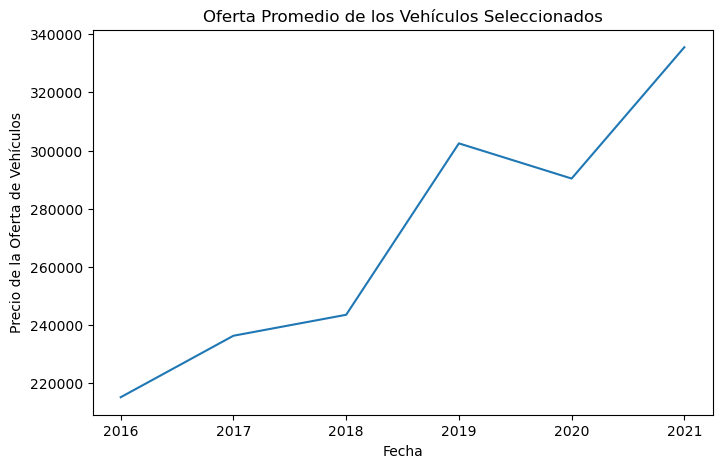

In [443]:
precio_mean = vs.groupby([(vs.Modelos)]).mean()

fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=vs, x = 'Año', y = 'Precio MXN', ci=None) #, hue = 'Modelos')
plt.xlabel("Fecha")
plt.ylabel("Precio de la Oferta de Vehículos")
plt.title("Oferta Promedio de los Vehículos Seleccionados")
plt.show()

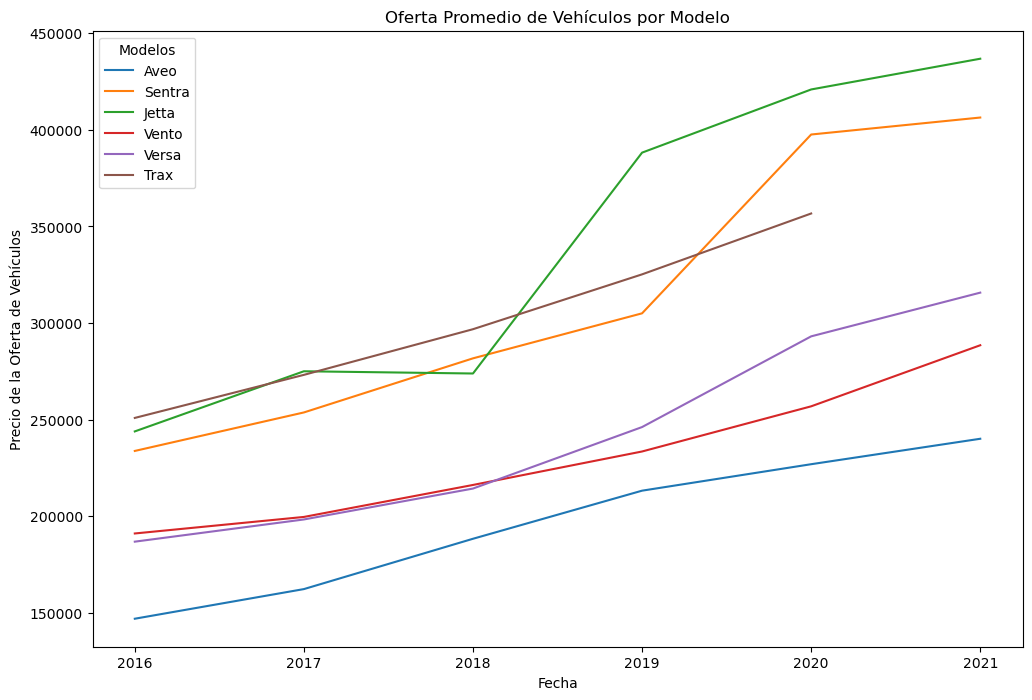

In [444]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=vs, x = 'Año', y = 'Precio MXN' , hue = 'Modelos', ci=None)
plt.xlabel("Fecha")
plt.ylabel("Precio de la Oferta de Vehículos")
plt.title("Oferta Promedio de Vehículos por Modelo")
plt.show()

In [397]:
ventas_scraping['Marcas'].unique()

array(['Chevrolet', 'Nissan', 'Volkswagen'], dtype=object)

In [398]:
ventas_scraping['Modelos'].unique()

array(['Aveo', 'Sentra', 'Jetta', 'Vento', 'Versa', 'Trax'], dtype=object)

In [399]:
# Encoding str values to input them into model
le = preprocessing.LabelEncoder()

ventas_scraping['Marcas_encoded'] = le.fit_transform(ventas_scraping['Marcas'])
ventas_scraping['Modelos_encoded'] = le.fit_transform(ventas_scraping['Modelos'])

ventas_scraping.head()

,Marcas,Modelos,Año_Modelo_Diff,Km,Precio MXN,Marcas_encoded,Modelos_encoded
Año,,,,,,,
2020-01-01,Chevrolet,Aveo,2,19440,212700,0,0
2018-01-01,Chevrolet,Aveo,4,50000,165000,0,0
2018-01-01,Chevrolet,Aveo,4,30000,197600,0,0
2019-01-01,Chevrolet,Aveo,3,15697,200800,0,0
2018-01-01,Chevrolet,Aveo,4,44769,180000,0,0


In [400]:
ventas_scraping['Marcas_encoded'].unique()

array([0, 1, 2])

In [401]:
ventas_scraping['Modelos_encoded'].unique()

array([0, 2, 1, 4, 5, 3])

In [402]:
ventas_scraping.shape

(849, 7)

### Programo el Random Forest

### Seleccion de Variabels

In [403]:
x = ventas_scraping[['Marcas_encoded', 'Modelos_encoded', 'Año_Modelo_Diff','Km']].values
y = ventas_scraping['Precio MXN'].values

In [404]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,  random_state=0)

In [405]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

### Se programa modelo de random forest

In [406]:
model = RandomForestRegressor(n_estimators=500, random_state=30, min_samples_split=2, min_samples_leaf=1, bootstrap=True)
#model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

In [407]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
best_parameters

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'random_state': 30,
 'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 6,
 'bootstrap': True}

### Se hace Forecasting

In [408]:
model.fit(x_train, y_train)
predict = model.predict(x_test)
predict.shape

(213,)

### Se mide precision de modelo

In [413]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 23551.4909
Mean Squared Error: 983139890.8408
Root Mean Squared Error: 31355.0616
(R^2) Score: 0.8003
Train Score : 96.56% and Test Score : 80.03% using Random Tree Regressor.
Accuracy: 91.09 %.


#### Se hacen predicciones por año

In [414]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[-1], periods=len(predict), freq="Y"))
predictions.to_csv("Predicted-price-data.csv")

In [415]:
predictions.head()

,Predictions
2019-12-31,280746.318
2020-12-31,236609.702
2021-12-31,416435.960
2022-12-31,208032.390
2023-12-31,241951.344


In [416]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[-1], periods=len(predict), freq="Y"))
predictions.to_csv("Predicted-price-data.csv")

#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:5])
oneyear_df.to_csv("one-year-predictions.csv")

oneyear_df.head()

,Predictions
2019-12-31,280746.318
2020-12-31,236609.702
2021-12-31,416435.960
2022-12-31,208032.390
2023-12-31,241951.344


Buy price and date
            Predictions
Date                   
2022-12-31    208032.39
Sell price and date
            Predictions
Date                   
2021-12-31    416435.96


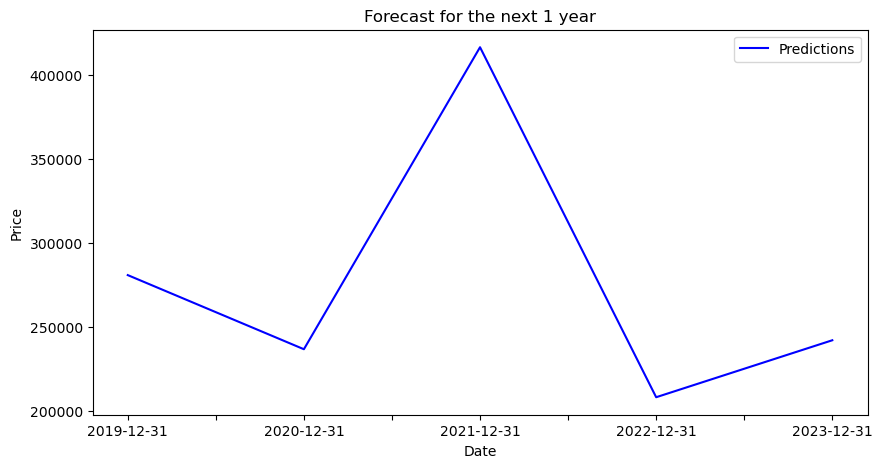

In [417]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
oneyear_df_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#### Predicciones de precio a nivel año caen bastante en comparacion con la media que se observa en el analisis estadistico, se necesita hacerlo a nivel mes

#### Predicciones a nivel Mes

In [39]:
# Analizar promedio por mes de oferta.

In [418]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[-1], periods=len(predict), freq="M"))
predictions.to_csv("Predicted-price-data.csv")

#colllects future days from predicted values
monthly_df = pd.DataFrame(predictions[:-1])
monthly_df.to_csv("monthly-predictions.csv")

In [419]:
predict.shape

(213,)

Buy price and date
            Predictions
Date                   
2020-08-31    143499.68
Sell price and date
            Predictions
Date                   
2021-11-30     484188.0


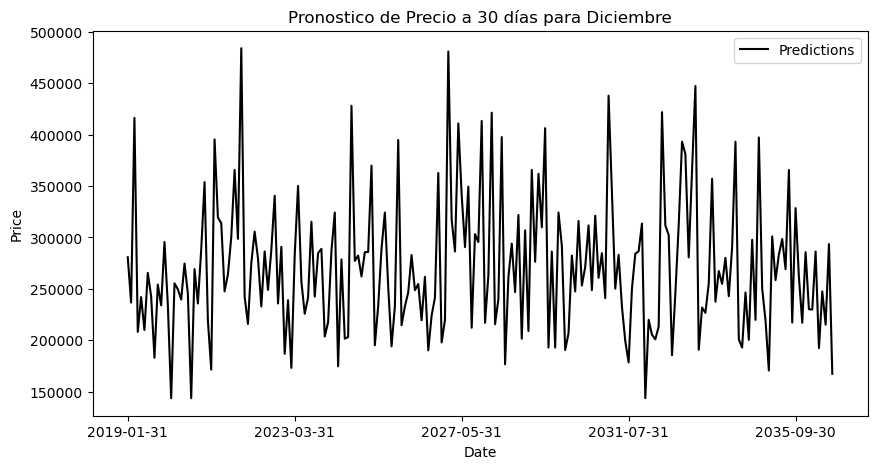

In [420]:
monthly_df_pred = pd.read_csv("monthly-predictions.csv")
monthly_df_pred.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
monthly_df_pred.set_index("Date", inplace=True)
buy_price = min(monthly_df_pred["Predictions"])
sell_price = max(monthly_df_pred["Predictions"])
monthly_buy = monthly_df_pred.loc[monthly_df_pred["Predictions"] == buy_price]
monthly_sell = monthly_df_pred.loc[monthly_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(monthly_buy)
print("Sell price and date")
print(monthly_sell)
monthly_df_pred["Predictions"].plot(figsize=(10, 5), title="Pronostico de Precio a 30 días para Diciembre", color="black")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
            Predictions
Date                   
2022-12-31   186711.946
Sell price and date
              Predictions
Date                     
2022-09-30  340626.265079


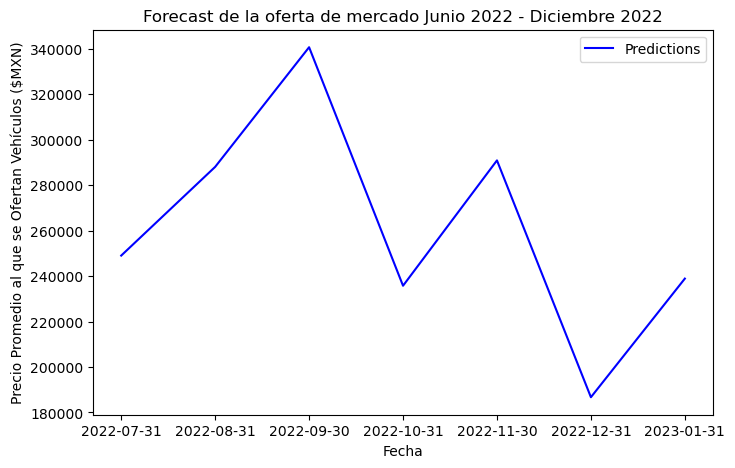

In [422]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[-1], periods=len(predict), freq="M"))
predictions.to_csv("Predicted-price-data.csv")

onemonth_df = pd.DataFrame(predictions[42:49])
onemonth_df.to_csv("one-month-predictions.csv")

onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
onemonth_df_pred.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
onemonth_df_pred.set_index("Date", inplace=True)

buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(8, 5), title="Forecast de la oferta de mercado Junio 2022 - Diciembre 2022", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Precio Promedio al que se Ofertan Vehículos ($MXN)")
plt.legend()
plt.show()

In [101]:
onemonth_df_pred.head(7)

,Predictions
Date,
2022-07-31,248998.060000
2022-08-31,288004.200000
2022-09-30,340626.265079
2022-10-31,235736.000000
2022-11-30,290858.950000
2022-12-31,186711.946000


#### Validacion de random forest con datos de oferta Diciembre 2022

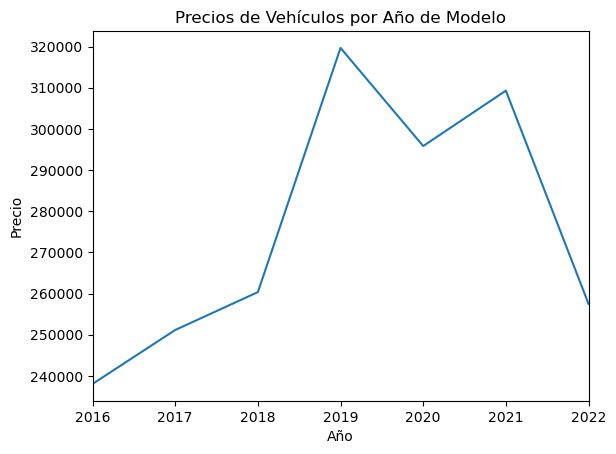

In [331]:
#Data
vs = pd.read_excel('Webscraping Data Validacion.xlsx')

vs = vs[vs['Modelos'].isin(['Aveo', 'Trax', 'Versa', 'Sentra', 'Jetta', 'Vento'])]

vs['Año']= vs['Año'].astype(str)
vs['Año']= "01/01/"+vs['Año']
vs['Año'] = pd.to_datetime(vs.Año, format='%m/%d/%Y')
#vs.set_index("Año", inplace=True)

precio_mean = vs.groupby([(vs.Año)]).mean()
#precio_mean = vs.groupby(['Año'],as_index=False).mean()
precio_mean.head()

#Grafico
precio_mean['Precio'].plot()
plt.ylabel("Precio")
plt.title('Precios de Vehículos por Año de Modelo')
plt.show()

In [193]:
vs['Precio'].mean()

287109.40731070493

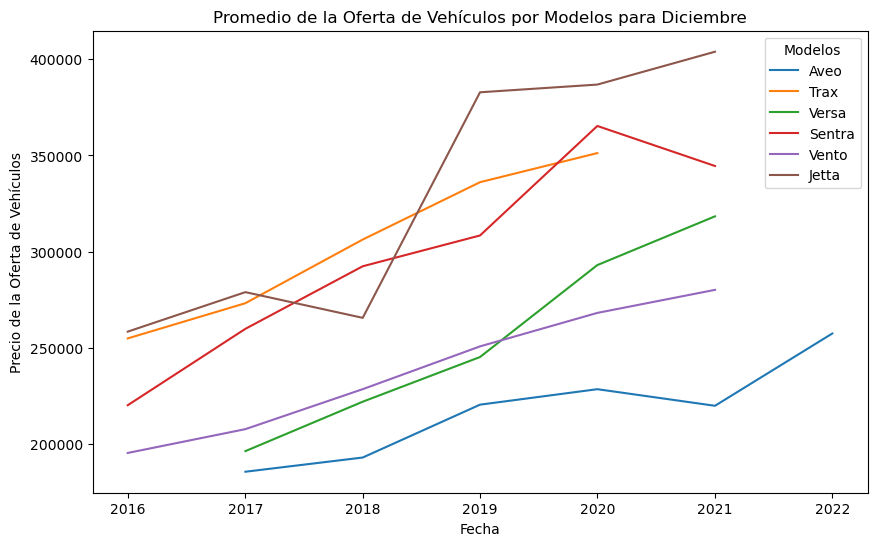

In [333]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=vs, x = 'Año', y = 'Precio' , hue = 'Modelos', ci=None)
plt.xlabel("Fecha")
plt.ylabel("Precio de la Oferta de Vehículos")
plt.title("Promedio de la Oferta de Vehículos por Modelos para Diciembre")
plt.show()

In [334]:
oferta_diciembre_aveo = vs[vs['Modelos'].isin(['Aveo'])]
oferta_diciembre_aveo['Precio'].mean()

217404.30952380953

In [335]:
oferta_diciembre_trax = vs[vs['Modelos'].isin(['Trax'])]
oferta_diciembre_trax['Precio'].mean()

310917.69491525425

In [336]:
oferta_diciembre_versa = vs[vs['Modelos'].isin(['Versa'])]
oferta_diciembre_versa['Precio'].mean()

258308.2435897436

In [337]:
oferta_diciembre_sentra = vs[vs['Modelos'].isin(['Sentra'])]
oferta_diciembre_sentra['Precio'].mean()

292242.6

In [338]:
oferta_diciembre_vento = vs[vs['Modelos'].isin(['Vento'])]
oferta_diciembre_vento['Precio'].mean()

248015.21276595743

In [339]:
oferta_diciembre_jetta = vs[vs['Modelos'].isin(['Jetta'])]
oferta_diciembre_jetta['Precio'].mean()

344426.64130434784

#### Se hacen predicciones por modelo

#### Se hace prediccion de Aveo

Incoorporar un 50%, por modelo, de los vehículos del scraping de Diciembre, y usar random forest para oferta de cada modelo. 

##### Se preparan datos

In [355]:
# Descarga y limpieza de datos
ventas_scraping = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

# Se elimina outlier de Km
ventas_scraping = ventas_scraping[(ventas_scraping['Km'] < 200000)]

# Se elimina outliers de Precio
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] > 50000)]
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] < 900000)]

# Se convierte Año en ambos sets de datos de Entero a objeto
ventas_scraping['Año']= ventas_scraping['Año'].astype(str)
ventas_scraping['Año']= "01/01/"+ventas_scraping['Año']

# Formateo campo de Año de Str a Datetime
ventas_scraping['Año'] = pd.to_datetime(ventas_scraping.Año, format='%m/%d/%Y')

# Selecciono las columnas para el modelaje
ventas_scraping = ventas_scraping[['Marcas', 'Modelos', 'Año', 'Año_Modelo_Diff', 'Km', 'Precio MXN']]

# Selecciono 1 de los modelos
ventas_scraping = ventas_scraping[ventas_scraping['Modelos'].isin(['Aveo'])]

# Declaro Año como Index
ventas_scraping.set_index("Año", inplace=True)

ventas_scraping.head()

,Marcas,Modelos,Año_Modelo_Diff,Km,Precio MXN
Año,,,,,
2020-01-01,Chevrolet,Aveo,2,19440,212700
2018-01-01,Chevrolet,Aveo,4,50000,165000
2018-01-01,Chevrolet,Aveo,4,30000,197600
2019-01-01,Chevrolet,Aveo,3,15697,200800
2018-01-01,Chevrolet,Aveo,4,44769,180000


In [356]:
ventas_scraping.shape

(122, 5)

##### Se codifican variables y se separan sets de entrenamiento y prueba

In [357]:
# Se hace enconding de variables cualitativas
le = preprocessing.LabelEncoder()

ventas_scraping['Marcas_encoded'] = le.fit_transform(ventas_scraping['Marcas'])
ventas_scraping['Modelos_encoded'] = le.fit_transform(ventas_scraping['Modelos'])

# Se prepara set de datos para entrenamiento de modelo
x = ventas_scraping[['Marcas_encoded', 'Modelos_encoded', 'Año_Modelo_Diff','Km']].values
y = ventas_scraping['Precio MXN'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50,  random_state=0)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

##### Se programa modelo

In [358]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_

# Se hace pronostico
model.fit(x_train, y_train)
predict = model.predict(x_test)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


In [359]:
predict.shape

(61,)

##### Se evalua modelo

In [360]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 15090.7203
Mean Squared Error: 349324591.3688
Root Mean Squared Error: 18690.2272
(R^2) Score: 0.5771
Train Score : 97.36% and Test Score : 57.71% using Random Tree Regressor.
Accuracy: 92.6 %.


##### Se predice a nivel a Mes

In [361]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[1], periods=len(predict), freq="M"))
predictions.to_csv("Predicted-price-data.csv")

#colllects future days from predicted values
monthly_df = pd.DataFrame(predictions[54:60])
monthly_df.to_csv("monthly-predictions.csv")

##### Resultados Aveo

Buy price and date
            Predictions
Date                   
2022-10-31   202813.798
Sell price and date
            Predictions
Date                   
2022-09-30   224354.798


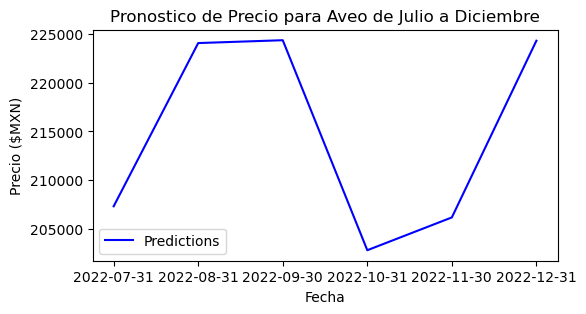

In [363]:
monthly_df_pred = pd.read_csv("monthly-predictions.csv")
monthly_df_pred.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
monthly_df_pred.set_index("Date", inplace=True)
buy_price = min(monthly_df_pred["Predictions"])
sell_price = max(monthly_df_pred["Predictions"])
monthly_buy = monthly_df_pred.loc[monthly_df_pred["Predictions"] == buy_price]
monthly_sell = monthly_df_pred.loc[monthly_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(monthly_buy)
print("Sell price and date")
print(monthly_sell)
monthly_df_pred["Predictions"].plot(figsize=(6, 3), title="Pronostico de Precio para Aveo de Julio a Diciembre", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Precio ($MXN)")
plt.legend()
plt.show()

#### Se hace prediccion de Sentra

##### Se preparan datos

In [349]:
# Descarga y limpieza de datos
ventas_scraping = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

# Se elimina outlier de Km
ventas_scraping = ventas_scraping[(ventas_scraping['Km'] < 200000)]

# Se elimina outliers de Precio
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] > 50000)]
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] < 900000)]

# Se convierte Año en ambos sets de datos de Entero a objeto
ventas_scraping['Año']= ventas_scraping['Año'].astype(str)
ventas_scraping['Año']= "01/01/"+ventas_scraping['Año']

# Formateo campo de Año de Str a Datetime
ventas_scraping['Año'] = pd.to_datetime(ventas_scraping.Año, format='%m/%d/%Y')

# Selecciono las columnas para el modelaje
ventas_scraping = ventas_scraping[['Marcas', 'Modelos', 'Año', 'Año_Modelo_Diff', 'Km', 'Precio MXN']]

# Selecciono 1 de los modelos
ventas_scraping = ventas_scraping[ventas_scraping['Modelos'].isin(['Sentra'])]

# Declaro Año como Index
ventas_scraping.set_index("Año", inplace=True)

ventas_scraping.head()

,Marcas,Modelos,Año_Modelo_Diff,Km,Precio MXN
Año,,,,,
2017-01-01,Nissan,Sentra,5,48000,235000
2019-01-01,Nissan,Sentra,3,56197,273000
2018-01-01,Nissan,Sentra,4,31577,265000
2020-01-01,Nissan,Sentra,2,6874,429000
2021-01-01,Nissan,Sentra,1,11731,395000


##### Se codifican variables y se separan sets de entrenamiento y prueba 

In [350]:
# Se hace enconding de variables cualitativas
le = preprocessing.LabelEncoder()

ventas_scraping['Marcas_encoded'] = le.fit_transform(ventas_scraping['Marcas'])
ventas_scraping['Modelos_encoded'] = le.fit_transform(ventas_scraping['Modelos'])

# Se prepara set de datos para entrenamiento de modelo
x = ventas_scraping[['Marcas_encoded', 'Modelos_encoded', 'Año_Modelo_Diff','Km']].values
y = ventas_scraping['Precio MXN'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50,  random_state=0)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

##### Se programa modelo

In [351]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_

# Se hace pronostico
model.fit(x_train, y_train)
predict = model.predict(x_test)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


##### Se evalua modelo

In [352]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 30228.4235
Mean Squared Error: 1404370290.9185
Root Mean Squared Error: 37474.9288
(R^2) Score: 0.6112
Train Score : 92.12% and Test Score : 61.12% using Random Tree Regressor.
Accuracy: 89.81 %.


##### Se predice a nivel Mes

In [353]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[1], periods=len(predict), freq="M"))
predictions.to_csv("Predicted-price-data.csv")

#colllects future days from predicted values
monthly_df = pd.DataFrame(predictions[42:48])
monthly_df.to_csv("monthly-predictions.csv")

##### Resultados Sentra

Buy price and date
              Predictions
Date                     
2022-08-31  281216.652617
Sell price and date
            Predictions
Date                   
2022-11-30   412578.426


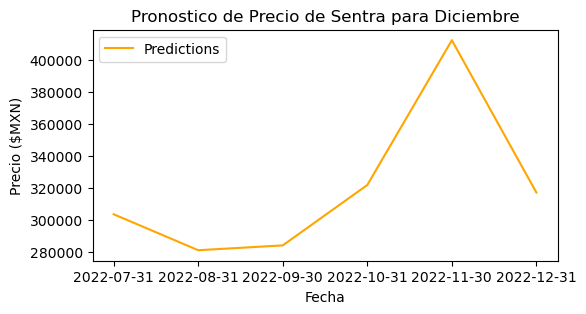

In [354]:
monthly_df_pred = pd.read_csv("monthly-predictions.csv")
monthly_df_pred.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
monthly_df_pred.set_index("Date", inplace=True)
buy_price = min(monthly_df_pred["Predictions"])
sell_price = max(monthly_df_pred["Predictions"])
monthly_buy = monthly_df_pred.loc[monthly_df_pred["Predictions"] == buy_price]
monthly_sell = monthly_df_pred.loc[monthly_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(monthly_buy)
print("Sell price and date")
print(monthly_sell)
monthly_df_pred["Predictions"].plot(figsize=(6, 3), title="Pronostico de Precio de Sentra para Diciembre", color="orange")
plt.xlabel("Fecha")
plt.ylabel("Precio ($MXN)")
plt.legend()
plt.show()

#### Se hace prediccion de Jetta

##### Se preparan datos

In [364]:
# Descarga y limpieza de datos
ventas_scraping = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

# Se elimina outlier de Km
ventas_scraping = ventas_scraping[(ventas_scraping['Km'] < 200000)]

# Se elimina outliers de Precio
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] > 50000)]
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] < 900000)]

# Se convierte Año en ambos sets de datos de Entero a objeto
ventas_scraping['Año']= ventas_scraping['Año'].astype(str)
ventas_scraping['Año']= "01/01/"+ventas_scraping['Año']

# Formateo campo de Año de Str a Datetime
ventas_scraping['Año'] = pd.to_datetime(ventas_scraping.Año, format='%m/%d/%Y')

# Selecciono las columnas para el modelaje
ventas_scraping = ventas_scraping[['Marcas', 'Modelos', 'Año', 'Año_Modelo_Diff', 'Km', 'Precio MXN']]

# Selecciono 1 de los modelos
ventas_scraping = ventas_scraping[ventas_scraping['Modelos'].isin(['Jetta'])]

# Declaro Año como Index
ventas_scraping.set_index("Año", inplace=True)

ventas_scraping.head()

,Marcas,Modelos,Año_Modelo_Diff,Km,Precio MXN
Año,,,,,
2017-01-01,Volkswagen,Jetta,5,94000,240000
2019-01-01,Volkswagen,Jetta,3,52959,410000
2020-01-01,Volkswagen,Jetta,2,40451,395000
2017-01-01,Volkswagen,Jetta,5,87440,245999
2016-01-01,Volkswagen,Jetta,6,87673,239999


##### Se codifican variables y se separan sets de entrenamiento y prueba

In [365]:
# Se hace enconding de variables cualitativas
le = preprocessing.LabelEncoder()

ventas_scraping['Marcas_encoded'] = le.fit_transform(ventas_scraping['Marcas'])
ventas_scraping['Modelos_encoded'] = le.fit_transform(ventas_scraping['Modelos'])

# Se prepara set de datos para entrenamiento de modelo
x = ventas_scraping[['Marcas_encoded', 'Modelos_encoded', 'Año_Modelo_Diff','Km']].values
y = ventas_scraping['Precio MXN'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50,  random_state=0)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

##### Se programa modelo

In [366]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_

# Se hace pronostico
model.fit(x_train, y_train)
predict = model.predict(x_test)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


##### Se evaulua modelo

In [367]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 38110.1469
Mean Squared Error: 2543814156.9436
Root Mean Squared Error: 50436.2385
(R^2) Score: 0.5398
Train Score : 95.56% and Test Score : 53.98% using Random Tree Regressor.
Accuracy: 88.3 %.


##### Se predice a nivel Mes

In [368]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[-1], periods=len(predict), freq="M"))
predictions.to_csv("Predicted-price-data.csv")

#colllects future days from predicted values
monthly_df = pd.DataFrame(predictions[30:36])
monthly_df.to_csv("monthly-predictions.csv")

##### Resultados Jetta

Buy price and date
            Predictions
Date                   
2022-11-30   235717.455
Sell price and date
              Predictions
Date                     
2022-12-31  277453.514652


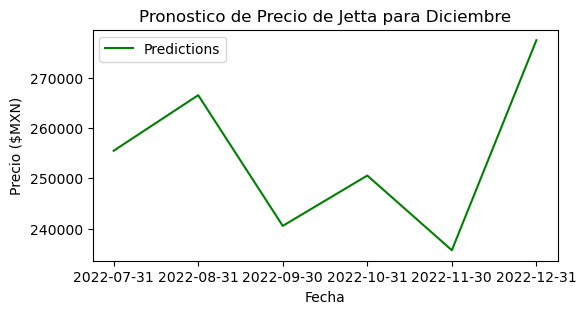

In [369]:
monthly_df_pred = pd.read_csv("monthly-predictions.csv")
monthly_df_pred.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
monthly_df_pred.set_index("Date", inplace=True)
buy_price = min(monthly_df_pred["Predictions"])
sell_price = max(monthly_df_pred["Predictions"])
monthly_buy = monthly_df_pred.loc[monthly_df_pred["Predictions"] == buy_price]
monthly_sell = monthly_df_pred.loc[monthly_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(monthly_buy)
print("Sell price and date")
print(monthly_sell)
monthly_df_pred["Predictions"].plot(figsize=(6, 3), title="Pronostico de Precio de Jetta para Diciembre", color="green")
plt.xlabel("Fecha")
plt.ylabel("Precio ($MXN)")
plt.legend()
plt.show()

#### Se hace prediccion de Vento

##### Se preparan datos

In [370]:
# Descarga y limpieza de datos
ventas_scraping = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

# Se elimina outlier de Km
ventas_scraping = ventas_scraping[(ventas_scraping['Km'] < 200000)]

# Se elimina outliers de Precio
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] > 50000)]
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] < 900000)]

# Se convierte Año en ambos sets de datos de Entero a objeto
ventas_scraping['Año']= ventas_scraping['Año'].astype(str)
ventas_scraping['Año']= "01/01/"+ventas_scraping['Año']

# Formateo campo de Año de Str a Datetime
ventas_scraping['Año'] = pd.to_datetime(ventas_scraping.Año, format='%m/%d/%Y')

# Selecciono las columnas para el modelaje
ventas_scraping = ventas_scraping[['Marcas', 'Modelos', 'Año', 'Año_Modelo_Diff', 'Km', 'Precio MXN']]

# Selecciono 1 de los modelos
ventas_scraping = ventas_scraping[ventas_scraping['Modelos'].isin(['Vento'])]

# Declaro Año como Index
ventas_scraping.set_index("Año", inplace=True)

ventas_scraping.head()

,Marcas,Modelos,Año_Modelo_Diff,Km,Precio MXN
Año,,,,,
2017-01-01,Volkswagen,Vento,5,62595,230000
2020-01-01,Volkswagen,Vento,2,24265,245000
2018-01-01,Volkswagen,Vento,4,67700,209999
2018-01-01,Volkswagen,Vento,4,59157,229999
2020-01-01,Volkswagen,Vento,2,71582,237500


##### Se codifican variables y se separan conjuntos de entrenamiento y prueba

In [371]:
# Se hace enconding de variables cualitativas
le = preprocessing.LabelEncoder()

ventas_scraping['Marcas_encoded'] = le.fit_transform(ventas_scraping['Marcas'])
ventas_scraping['Modelos_encoded'] = le.fit_transform(ventas_scraping['Modelos'])

# Se prepara set de datos para entrenamiento de modelo
x = ventas_scraping[['Marcas_encoded', 'Modelos_encoded', 'Año_Modelo_Diff','Km']].values
y = ventas_scraping['Precio MXN'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50,  random_state=0)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

##### Se programa modelo

In [372]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_

# Se hace pronostico
model.fit(x_train, y_train)
predict = model.predict(x_test)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


##### Se evalua modelo

In [373]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 23813.5281
Mean Squared Error: 1040339244.1092
Root Mean Squared Error: 32254.2903
(R^2) Score: 0.4174
Train Score : 91.91% and Test Score : 41.74% using Random Tree Regressor.
Accuracy: 88.76 %.


##### Se predice a nivel Mes

In [374]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[1], periods=len(predict), freq="M"))
predictions.to_csv("Predicted-price-data.csv")

#colllects future days from predicted values
monthly_df = pd.DataFrame(predictions[30:36])
monthly_df.to_csv("monthly-predictions.csv")

##### Resultados Vento

Buy price and date
            Predictions
Date                   
2022-10-31   187305.704
Sell price and date
              Predictions
Date                     
2022-09-30  285728.466667


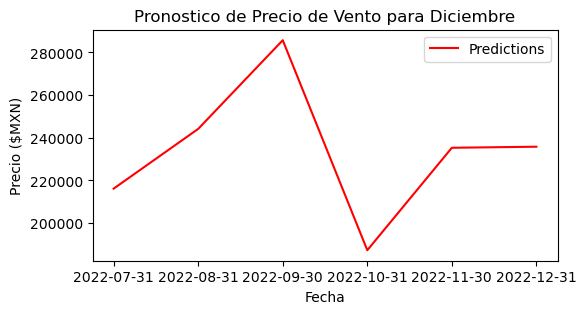

In [375]:
monthly_df_pred = pd.read_csv("monthly-predictions.csv")
monthly_df_pred.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
monthly_df_pred.set_index("Date", inplace=True)
buy_price = min(monthly_df_pred["Predictions"])
sell_price = max(monthly_df_pred["Predictions"])
monthly_buy = monthly_df_pred.loc[monthly_df_pred["Predictions"] == buy_price]
monthly_sell = monthly_df_pred.loc[monthly_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(monthly_buy)
print("Sell price and date")
print(monthly_sell)
monthly_df_pred["Predictions"].plot(figsize=(6, 3), title="Pronostico de Precio de Vento para Diciembre", color="red")
plt.xlabel("Fecha")
plt.ylabel("Precio ($MXN)")
plt.legend()
plt.show()

#### Se hace prediccion de Versa

##### Se preparan datos

In [376]:
# Descarga y limpieza de datos
ventas_scraping = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

# Se elimina outlier de Km
ventas_scraping = ventas_scraping[(ventas_scraping['Km'] < 200000)]

# Se elimina outliers de Precio
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] > 50000)]
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] < 900000)]

# Se convierte Año en ambos sets de datos de Entero a objeto
ventas_scraping['Año']= ventas_scraping['Año'].astype(str)
ventas_scraping['Año']= "01/01/"+ventas_scraping['Año']

# Formateo campo de Año de Str a Datetime
ventas_scraping['Año'] = pd.to_datetime(ventas_scraping.Año, format='%m/%d/%Y')

# Selecciono las columnas para el modelaje
ventas_scraping = ventas_scraping[['Marcas', 'Modelos', 'Año', 'Año_Modelo_Diff', 'Km', 'Precio MXN']]

# Selecciono 1 de los modelos
ventas_scraping = ventas_scraping[ventas_scraping['Modelos'].isin(['Versa'])]

# Declaro Año como Index
ventas_scraping.set_index("Año", inplace=True)

ventas_scraping.head()

,Marcas,Modelos,Año_Modelo_Diff,Km,Precio MXN
Año,,,,,
2020-01-01,Nissan,Versa,2,65720,310900
2017-01-01,Nissan,Versa,5,82450,169000
2018-01-01,Nissan,Versa,4,36000,199000
2017-01-01,Nissan,Versa,5,86589,171500
2018-01-01,Nissan,Versa,4,56347,209900


##### Se codifican variables y se separan conjuntos entrenamiento y prueba

In [377]:
# Se hace enconding de variables cualitativas
le = preprocessing.LabelEncoder()

ventas_scraping['Marcas_encoded'] = le.fit_transform(ventas_scraping['Marcas'])
ventas_scraping['Modelos_encoded'] = le.fit_transform(ventas_scraping['Modelos'])

# Se prepara set de datos para entrenamiento de modelo
x = ventas_scraping[['Marcas_encoded', 'Modelos_encoded', 'Año_Modelo_Diff','Km']].values
y = ventas_scraping['Precio MXN'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,  random_state=0)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

##### Se programa modelo

In [378]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_

# Se hace pronostico
model.fit(x_train, y_train)
predict = model.predict(x_test)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


##### Se evalua modelo

In [379]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 18125.4173
Mean Squared Error: 561851387.4686
Root Mean Squared Error: 23703.4046
(R^2) Score: 0.7525
Train Score : 93.90% and Test Score : 75.25% using Random Tree Regressor.
Accuracy: 92.62 %.


##### Se hace pronostico a nivel Mes

In [380]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[5], periods=len(predict), freq="M"))
predictions.to_csv("Predicted-price-data.csv")

#colllects future days from predicted values
monthly_df = pd.DataFrame(predictions[30:36])
monthly_df.to_csv("monthly-predictions.csv")

##### Resultados Versa

Buy price and date
            Predictions
Date                   
2022-12-31     194308.2
Sell price and date
            Predictions
Date                   
2022-11-30     319885.6


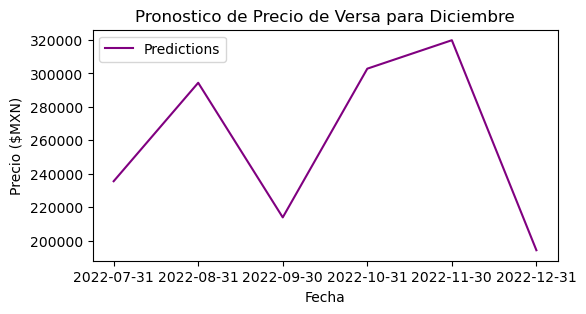

In [382]:
monthly_df_pred = pd.read_csv("monthly-predictions.csv")
monthly_df_pred.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
monthly_df_pred.set_index("Date", inplace=True)
buy_price = min(monthly_df_pred["Predictions"])
sell_price = max(monthly_df_pred["Predictions"])
monthly_buy = monthly_df_pred.loc[monthly_df_pred["Predictions"] == buy_price]
monthly_sell = monthly_df_pred.loc[monthly_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(monthly_buy)
print("Sell price and date")
print(monthly_sell)
monthly_df_pred["Predictions"].plot(figsize=(6, 3), title="Pronóstico de Precio de Versa para Diciembre", color="purple")
plt.xlabel("Fecha")
plt.ylabel("Precio ($MXN)")
plt.legend()
plt.show()

#### Se hace prediccion de Trax

##### Se preparan datos

In [383]:
# Descarga y limpieza de datos
ventas_scraping = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

# Se elimina outlier de Km
ventas_scraping = ventas_scraping[(ventas_scraping['Km'] < 200000)]

# Se elimina outliers de Precio
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] > 50000)]
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] < 900000)]

# Se convierte Año en ambos sets de datos de Entero a objeto
ventas_scraping['Año']= ventas_scraping['Año'].astype(str)
ventas_scraping['Año']= "01/01/"+ventas_scraping['Año']

# Formateo campo de Año de Str a Datetime
ventas_scraping['Año'] = pd.to_datetime(ventas_scraping.Año, format='%m/%d/%Y')

# Selecciono las columnas para el modelaje
ventas_scraping = ventas_scraping[['Marcas', 'Modelos', 'Año', 'Año_Modelo_Diff', 'Km', 'Precio MXN']]

# Selecciono 1 de los modelos
ventas_scraping = ventas_scraping[ventas_scraping['Modelos'].isin(['Trax'])]

# Declaro Año como Index
ventas_scraping.set_index("Año", inplace=True)

ventas_scraping.head()

,Marcas,Modelos,Año_Modelo_Diff,Km,Precio MXN
Año,,,,,
2020-01-01,Chevrolet,Trax,2,78572,355400
2017-01-01,Chevrolet,Trax,5,76420,249000
2017-01-01,Chevrolet,Trax,5,19100,293100
2019-01-01,Chevrolet,Trax,3,75500,305000
2018-01-01,Chevrolet,Trax,4,49000,292900


##### Se codifican variables y se separan conjuntos de entrenamiento y prueba

In [384]:
# Se hace enconding de variables cualitativas
le = preprocessing.LabelEncoder()

ventas_scraping['Marcas_encoded'] = le.fit_transform(ventas_scraping['Marcas'])
ventas_scraping['Modelos_encoded'] = le.fit_transform(ventas_scraping['Modelos'])

# Se prepara set de datos para entrenamiento de modelo
x = ventas_scraping[['Marcas_encoded', 'Modelos_encoded', 'Año_Modelo_Diff','Km']].values
y = ventas_scraping['Precio MXN'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.55,  random_state=0)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

##### Se programa modelo

In [385]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_

# Se hace pronostico
model.fit(x_train, y_train)
predict = model.predict(x_test)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


##### Se evalua modelo

In [386]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 24795.8539
Mean Squared Error: 943638206.3303
Root Mean Squared Error: 30718.6947
(R^2) Score: 0.4695
Train Score : 93.39% and Test Score : 46.95% using Random Tree Regressor.
Accuracy: 91.71 %.


##### Se hace pronostico a nivel Mes

In [387]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=ventas_scraping.index[10], periods=len(predict), freq="M"))
predictions.to_csv("Predicted-price-data.csv")

#colllects future days from predicted values
monthly_df = pd.DataFrame(predictions[42:48])
monthly_df.to_csv("monthly-predictions.csv")

##### Resultados Trax

Buy price and date
            Predictions
Date                   
2022-08-31     237711.0
Sell price and date
            Predictions
Date                   
2022-12-31   335733.762


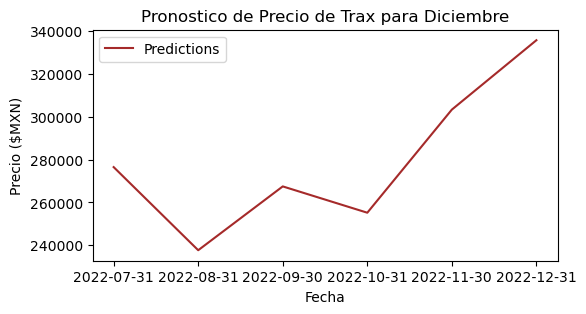

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=1000, random_state=2; total time=   0.8s
[CV] END bootstrap=False, max_depth=12, min_samples_leaf=13, min_samples_split=10, n_estimators=1000, random_state=42; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=1; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=9, n_estimators=50, random_state=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=9, n_estimators=20, random_state=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=30; total time=   0.8s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=13, min_samples_split=2, n_estimators=1000, random_state=30; total time=   1.1s
[CV] END bootstrap=False, max_depth=9, min_samples_leaf=13

In [388]:
monthly_df_pred = pd.read_csv("monthly-predictions.csv")
monthly_df_pred.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
monthly_df_pred.set_index("Date", inplace=True)
buy_price = min(monthly_df_pred["Predictions"])
sell_price = max(monthly_df_pred["Predictions"])
monthly_buy = monthly_df_pred.loc[monthly_df_pred["Predictions"] == buy_price]
monthly_sell = monthly_df_pred.loc[monthly_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(monthly_buy)
print("Sell price and date")
print(monthly_sell)
monthly_df_pred["Predictions"].plot(figsize=(6, 3), title="Pronostico de Precio de Trax para Diciembre", color="brown")
plt.xlabel("Fecha")
plt.ylabel("Precio ($MXN)")
plt.legend()
plt.show()

# Serie de Tiempo con datos del INEGI

In [424]:
!pip install pmdarima
from datetime import datetime
import pytz
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Preparo los datos

In [425]:
### Para los datos del INEGI no es necesario eliminar outliers, solo se estandarizan columnas

In [426]:
#Cargo el set de datos
ventas_inegi = pd.read_excel('Ventas Entrenamiento INEGI.xlsx')

# Cambio el formato de las columnas ANIO y ID_MES de int a str
ventas_inegi["ANIO"] = ventas_inegi["ANIO"].astype(str)
ventas_inegi["ID_MES"] = ventas_inegi["ID_MES"].astype(str)

# Hago columna nueva de fecha en DF
ventas_inegi["FECHA"] = ventas_inegi["ANIO"]+"/"+ventas_inegi["ID_MES"]

# Transformo FECHA de objeto a Datetime
ventas_inegi['FECHA'] = pd.to_datetime(ventas_inegi.FECHA, format='%Y/%m')

# Selecciono los 6 modelos modelos de las marcas de las 3 marcas mas populares
data_inegi = ventas_inegi[ventas_inegi['MODELO'].isin(['Aveo', 'Trax', 'Versa', 'Sentra', 'Jetta', 'Vento'])]

# Selecciono las columnas necesarias
ts_data = data_inegi[['FECHA', 'UNI_VEH', 'MARCA', 'MODELO']]

# Agrego las columnas por año 
ts_data.set_index("FECHA", inplace=True)
ts_data= data_inegi.groupby(['FECHA','MARCA', 'MODELO'])['UNI_VEH'].agg(sum).reset_index()
ts_data.head()

,FECHA,MARCA,MODELO,UNI_VEH
0,2016-01-01,General Motors,Aveo,4967
1,2016-01-01,General Motors,Trax,1998
2,2016-01-01,Nissan,Sentra,2996
3,2016-01-01,Nissan,Versa,6687
4,2016-01-01,Volkswagen,Jetta,4106


#### Se inicia con la prediccion considerando los 6 modelos mas populares

In [427]:
ts_data.head()

,FECHA,MARCA,MODELO,UNI_VEH
0,2016-01-01,General Motors,Aveo,4967
1,2016-01-01,General Motors,Trax,1998
2,2016-01-01,Nissan,Sentra,2996
3,2016-01-01,Nissan,Versa,6687
4,2016-01-01,Volkswagen,Jetta,4106


In [431]:
unidades = ts_data.groupby(by=["FECHA"]).sum()
unidades

,UNI_VEH
FECHA,
2016-01-01,25074
2016-02-01,24347
2016-03-01,25945
2016-04-01,26112
2016-05-01,25360
...,...
2022-07-01,8062
2022-08-01,7044
2022-09-01,5459


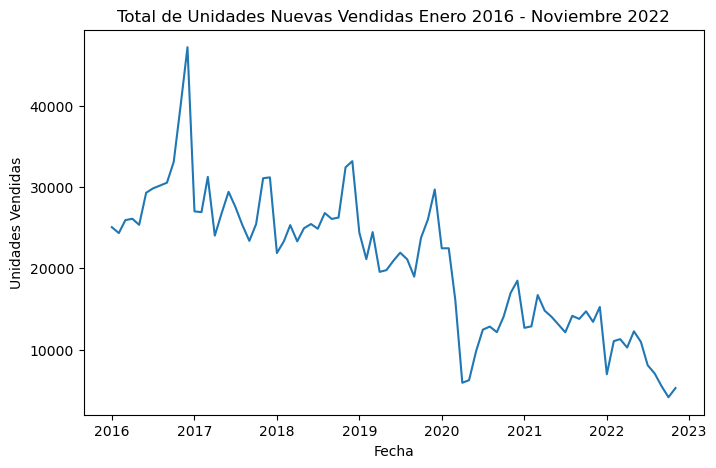

In [432]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=unidades, x = 'FECHA', y = 'UNI_VEH', ci = None) #, hue = 'MODELO'
plt.xlabel("Fecha")
plt.ylabel("Unidades Vendidas")
plt.title("Total de Unidades Nuevas Vendidas Enero 2016 - Noviembre 2022")
plt.show()

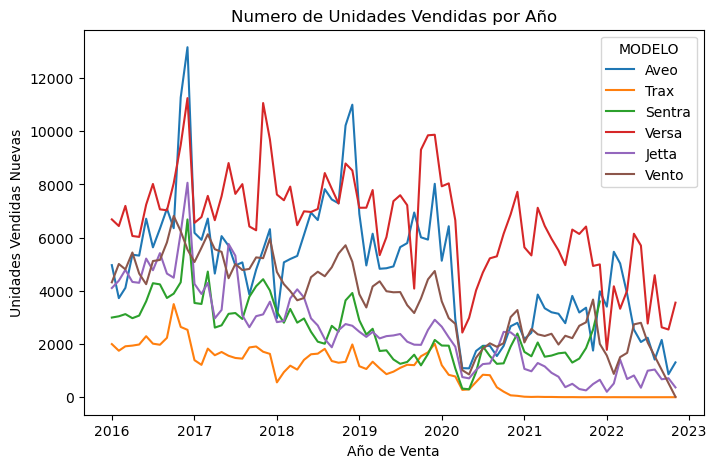

In [700]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=ts_data, x = 'FECHA', y = 'UNI_VEH' , hue = 'MODELO')
plt.xlabel("Año de Venta")
plt.ylabel("Unidades Vendidas Nuevas")
plt.title("Numero de Unidades Vendidas por Año")
plt.show()

In [21]:
ts_data= data_inegi.groupby(['FECHA'])['UNI_VEH'].agg(sum).reset_index()
ts_data.set_index("FECHA", inplace=True)
ts_data.head()

,UNI_VEH
FECHA,
2016-01-01,25074
2016-02-01,24347
2016-03-01,25945
2016-04-01,26112
2016-05-01,25360


In [24]:
model = pm.auto_arima(ts_data.UNI_VEH, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1622.184, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1743.026, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1620.416, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1673.533, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1899.947, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1622.351, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1625.033, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1623.424, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.220 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -807.208
Date:                Thu, 13 Apr 2023   AIC                           1620.416
Time:                        17:06:1

/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in r

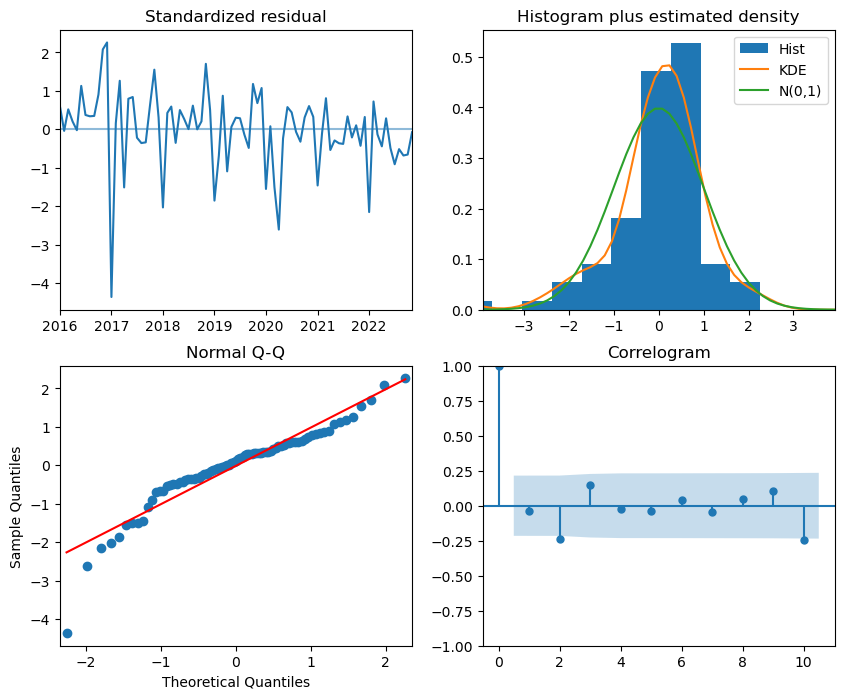

In [25]:
# Review the diagnostics
model.plot_diagnostics(figsize=(10,8))
plt.show()

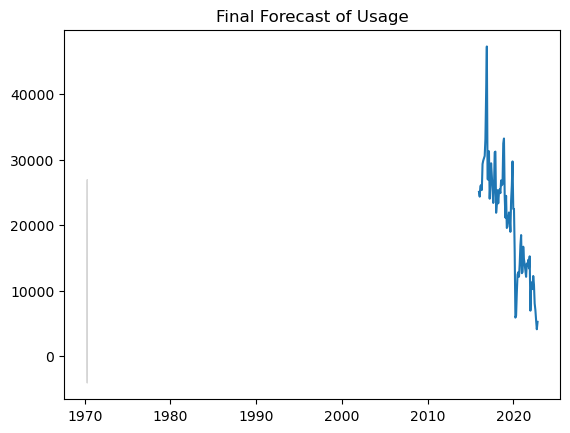

In [26]:
# Ploteo el modelo
# Forecast
n_periods = 6
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(ts_data.UNI_VEH), len(ts_data.UNI_VEH)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(ts_data.UNI_VEH)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

In [27]:
ts_data = ts_data["UNI_VEH"]

In [28]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(ts_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value enco

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1624.147, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1899.947, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1623.424, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1804.048, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1624.862, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1625.488, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1620.416, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1743.026, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1622.351, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1622.184, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1673.533, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1625.033, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.270 seconds


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -807.208
Date:                Thu, 13 Apr 2023   AIC                           1620.416
Time:                        17:07:03   BIC                           1627.673
Sample:                    01-01-2016   HQIC                          1623.332
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1824.3964   1075.160      1.697      0.090    -282.878    3931.671
ar.L1          0.9048      0.035     26.220      0.000       0.837       0.972
sigma2      1.618e+07      0.147    1.1e+08      0.000    1.62e+07    1.62e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                67.34
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.35e+23. Standard errors may be unstable.
"""

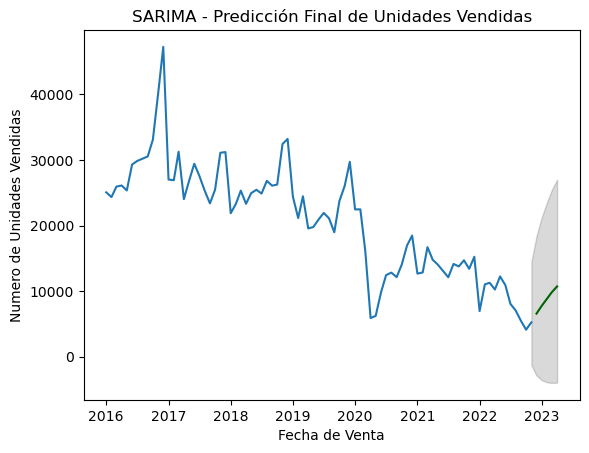

In [39]:
# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(ts_data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(ts_data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Predicción Final de Unidades Vendidas")
plt.ylabel("Numero de Unidades Vendidas")
plt.xlabel("Fecha de Venta")
plt.show()

#### Se compara forecast contra datos reales de ventas

In [731]:
#Cargo el set de datos
ventas_diciembre = pd.read_excel('Ventas Validacion INEGI.xlsx')

# Cambio el formato de las columnas ANIO y ID_MES de int a str
ventas_diciembre["ANIO"] = ventas_diciembre["ANIO"].astype(str)
ventas_diciembre["ID_MES"] = ventas_diciembre["ID_MES"].astype(str)

# Hago columna nueva de fecha en DF
ventas_diciembre["FECHA"] = ventas_diciembre["ANIO"]+"/"+ventas_diciembre["ID_MES"]

# Transformo FECHA de objeto a Datetime
ventas_diciembre['FECHA'] = pd.to_datetime(ventas_diciembre.FECHA, format='%Y/%m')

# Selecciono los 6 modelos modelos de las marcas de las 3 marcas mas populares
data_inegi = ventas_diciembre[ventas_diciembre['MODELO'].isin(['Aveo', 'Trax', 'Versa', 'Sentra', 'Jetta', 'Vento'])]

# Selecciono las columnas necesarias
validacion_data = data_inegi[['FECHA', 'UNI_VEH', 'MARCA', 'MODELO']]

# Agrego las columnas por año 
validacion_data.set_index("FECHA", inplace=True)
validacion_data= data_inegi.groupby(['FECHA','MARCA', 'MODELO'])['UNI_VEH'].agg(sum).reset_index()
validacion_data.head()

,FECHA,MARCA,MODELO,UNI_VEH
0,2022-11-01,General Motors,Aveo,1310
1,2022-11-01,General Motors,Trax,1
2,2022-11-01,Nissan,Sentra,2386
3,2022-11-01,Nissan,Versa,3556
4,2022-11-01,Volkswagen,Jetta,370


In [732]:
validacion_data['UNI_VEH'].sum()

18582

In [733]:
ts_data.head()

,FECHA,MARCA,MODELO,UNI_VEH
0,2016-01-01,General Motors,Aveo,4967
1,2016-01-01,General Motors,Trax,1998
2,2016-01-01,Nissan,Sentra,2996
3,2016-01-01,Nissan,Versa,6687
4,2016-01-01,Volkswagen,Jetta,4106


In [433]:
#Cargo el set de datos
ventas_diciembre = pd.read_excel('Ventas Validacion INEGI.xlsx')

# Cambio el formato de las columnas ANIO y ID_MES de int a str
ventas_diciembre["ANIO"] = ventas_diciembre["ANIO"].astype(str)
ventas_diciembre["ID_MES"] = ventas_diciembre["ID_MES"].astype(str)

# Hago columna nueva de fecha en DF
ventas_diciembre["FECHA"] = ventas_diciembre["ANIO"]+"/"+ventas_diciembre["ID_MES"]

# Transformo FECHA de objeto a Datetime
ventas_diciembre['FECHA'] = pd.to_datetime(ventas_diciembre.FECHA, format='%Y/%m')

# Selecciono los 6 modelos modelos de las marcas de las 3 marcas mas populares
data_inegi = ventas_diciembre[ventas_diciembre['MODELO'].isin(['Aveo', 'Trax', 'Versa', 'Sentra', 'Jetta', 'Vento'])]

# Selecciono las columnas necesarias
data_v = data_inegi[['FECHA', 'UNI_VEH', 'MARCA', 'MODELO']]

# Agrego las columnas por año 
data_v.set_index("FECHA", inplace=True)
data_v= data_v.groupby(['FECHA','MARCA', 'MODELO'])['UNI_VEH'].agg(sum).reset_index()

data_v['UNI_VEH'].sum()

18582

In [436]:
data_v1 = data_inegi.groupby(['FECHA']).agg(sum).reset_index()
data_v1

,FECHA,ID_PAIS_ORIGEN,UNI_VEH
0,2022-11-01,145,7639
1,2022-12-01,145,10943


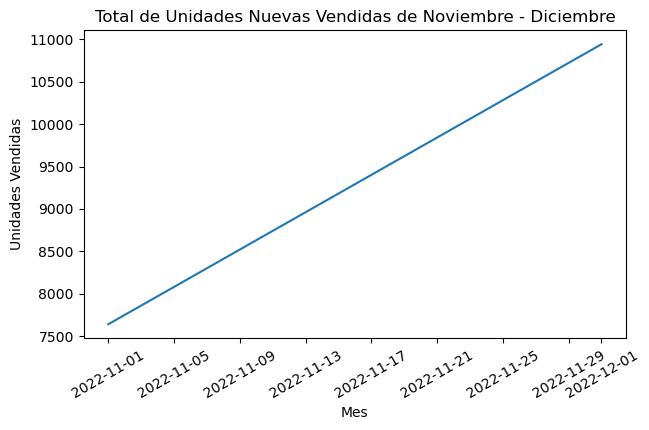

In [437]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(data=data_v1, x = 'FECHA', y = 'UNI_VEH', ci = None) #, hue = 'MODELO'
plt.xlabel("Mes")
plt.ylabel("Unidades Vendidas")
plt.title("Total de Unidades Nuevas Vendidas de Noviembre - Diciembre")
plt.xticks(rotation=30)
plt.show()

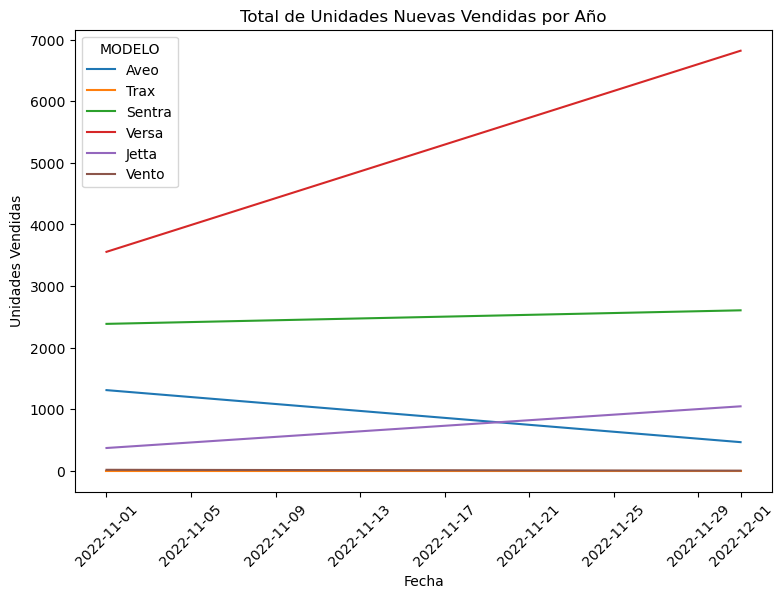

In [752]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=data_v, x = 'FECHA', y = 'UNI_VEH', ci = None , hue = 'MODELO')
plt.xlabel("Fecha")
plt.ylabel("Unidades Vendidas")
plt.title("Total de Unidades Nuevas Vendidas por Año")
plt.xticks(rotation=45)
plt.show()

### Prediccion por modelo de vehículo

#### Aveo

In [55]:
# Selecciono la data y la limpio

# Selecciono el aveo
data_inegi = ventas_inegi[ventas_inegi['MODELO'].isin(['Aveo'])]

# Selecciono las columnas necesarias
ts_data = data_inegi[['FECHA', 'UNI_VEH', 'MARCA', 'MODELO']]

# Agrupo 
ts_data= data_inegi.groupby(['FECHA'])['UNI_VEH'].agg(sum).reset_index()
ts_data.head()
ts_data.set_index("FECHA", inplace=True)

In [56]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(ts_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value enco

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1444.395, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1443.183, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1441.535, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1442.467, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1441.596, Time=0.02 sec


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in r

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1442.374, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1439.555, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1439.021, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1441.253, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1440.782, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1440.652, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1439.329, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1439.099, Time=0.01 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1442.412, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.461 seconds


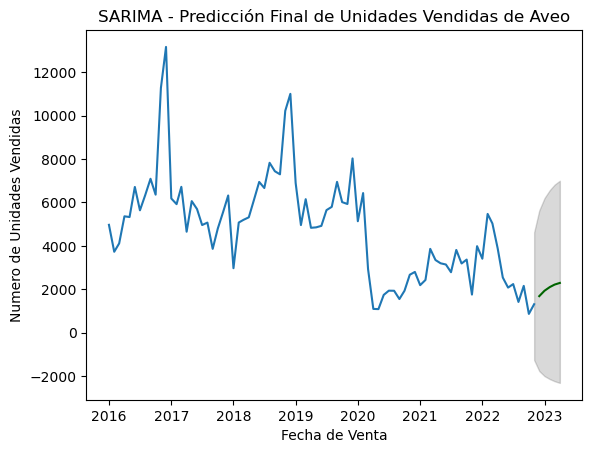

In [57]:
# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(ts_data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(ts_data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Predicción Final de Unidades Vendidas de Aveo")
plt.ylabel("Numero de Unidades Vendidas")
plt.xlabel("Fecha de Venta")
plt.show()

#### Trax

In [58]:
# Selecciono la data y la limpio

# Selecciono el aveo
data_inegi = ventas_inegi[ventas_inegi['MODELO'].isin(['Trax'])]

# Selecciono las columnas necesarias
ts_data = data_inegi[['FECHA', 'UNI_VEH', 'MARCA', 'MODELO']]

# Agrupo 
ts_data= data_inegi.groupby(['FECHA'])['UNI_VEH'].agg(sum).reset_index()
ts_data.head()
ts_data.set_index("FECHA", inplace=True)

In [59]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(ts_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1152.275, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1152.968, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1152.569, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1150.693, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.145 seconds


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value enco

/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


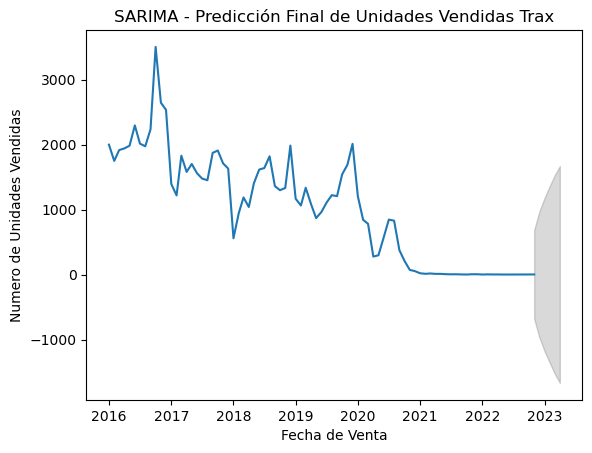

In [60]:
# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(ts_data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(ts_data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Predicción Final de Unidades Vendidas Trax")
plt.ylabel("Numero de Unidades Vendidas")
plt.xlabel("Fecha de Venta")
plt.show()

#### Sentra

In [61]:
# Selecciono la data y la limpio

# Selecciono el aveo
data_inegi = ventas_inegi[ventas_inegi['MODELO'].isin(['Sentra'])]

# Selecciono las columnas necesarias
ts_data = data_inegi[['FECHA', 'UNI_VEH', 'MARCA', 'MODELO']]

# Agrupo 
ts_data= data_inegi.groupby(['FECHA'])['UNI_VEH'].agg(sum).reset_index()
ts_data.head()
ts_data.set_index("FECHA", inplace=True)

In [62]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(ts_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value enco

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1136.920, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1140.477, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1140.099, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1138.168, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1138.487, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1138.211, Time=0.03 sec


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1137.469, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1135.959, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1137.820, Time=0.08 sec


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in r

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1133.979, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1136.178, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1135.468, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1135.823, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1135.043, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1137.395, Time=0.06 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 0.690 seconds


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


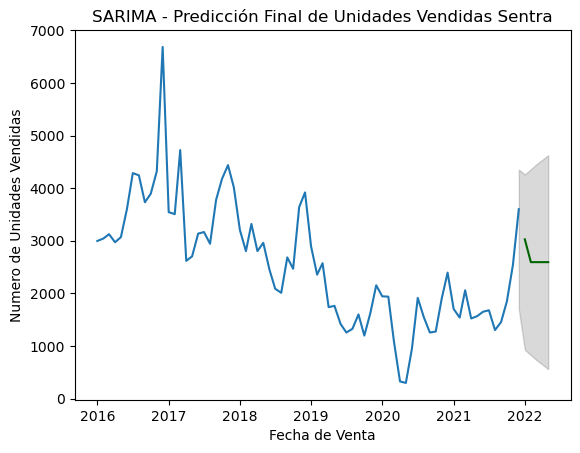

In [63]:
# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(ts_data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(ts_data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Predicción Final de Unidades Vendidas Sentra")
plt.ylabel("Numero de Unidades Vendidas")
plt.xlabel("Fecha de Venta")
plt.show()

#### Versa

In [64]:
# Selecciono la data y la limpio

# Selecciono el aveo
data_inegi = ventas_inegi[ventas_inegi['MODELO'].isin(['Versa'])]

# Selecciono las columnas necesarias
ts_data = data_inegi[['FECHA', 'UNI_VEH', 'MARCA', 'MODELO']]

# Agrupo 
ts_data= data_inegi.groupby(['FECHA'])['UNI_VEH'].agg(sum).reset_index()
ts_data.head()
ts_data.set_index("FECHA", inplace=True)

In [65]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(ts_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value enco

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1458.154, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1702.732, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1463.779, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1616.935, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1451.356, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1462.150, Time=0.02 sec


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1453.427, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1452.682, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1451.160, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1569.245, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1452.999, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1543.877, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1451.892, Time=0.02 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 0.669 seconds


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


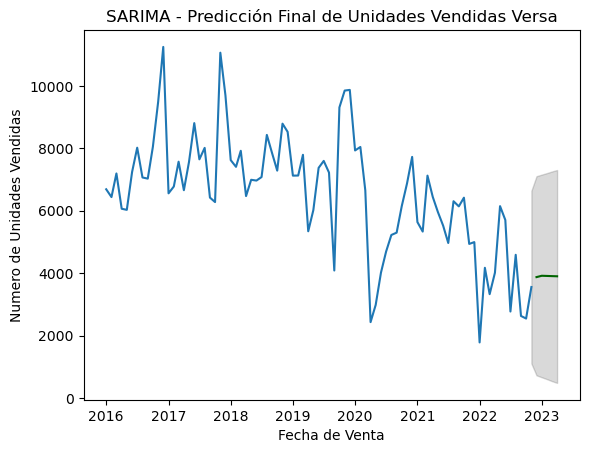

In [66]:
# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(ts_data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(ts_data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Predicción Final de Unidades Vendidas Versa")
plt.ylabel("Numero de Unidades Vendidas")
plt.xlabel("Fecha de Venta")
plt.show()

In [67]:
# Selecciono la data y la limpio

# Selecciono el aveo
data_inegi = ventas_inegi[ventas_inegi['MODELO'].isin(['Jetta'])]

# Selecciono las columnas necesarias
ts_data = data_inegi[['FECHA', 'UNI_VEH', 'MARCA', 'MODELO']]

# Agrupo 
ts_data= data_inegi.groupby(['FECHA'])['UNI_VEH'].agg(sum).reset_index()
ts_data.head()
ts_data.set_index("FECHA", inplace=True)

In [68]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(ts_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value enco

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1344.833, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1564.580, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1343.566, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1345.468, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1344.884, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1341.444, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1466.275, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1343.430, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1343.348, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1395.739, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1342.050, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.386 seconds


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


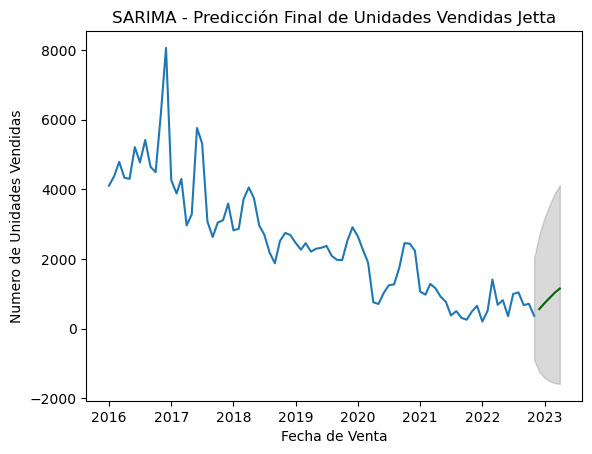

In [69]:
# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(ts_data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(ts_data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Predicción Final de Unidades Vendidas Jetta")
plt.ylabel("Numero de Unidades Vendidas")
plt.xlabel("Fecha de Venta")
plt.show()

#### Vento

In [40]:
# Selecciono la data y la limpio

# Selecciono el aveo
data_inegi = ventas_inegi[ventas_inegi['MODELO'].isin(['Vento'])]

# Selecciono las columnas necesarias
ts_data = data_inegi[['FECHA', 'UNI_VEH', 'MARCA', 'MODELO']]

# Agrupo 
ts_data= data_inegi.groupby(['FECHA'])['UNI_VEH'].agg(sum).reset_index()
ts_data.head()
ts_data.set_index("FECHA", inplace=True)

In [41]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(ts_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value enco

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1273.435, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1556.927, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1272.217, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1273.571, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1275.389, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1270.980, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1401.524, Time=0.01 sec


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in r

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1271.992, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1271.706, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1337.565, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1273.808, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.437 seconds


/Users/martinrivera/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


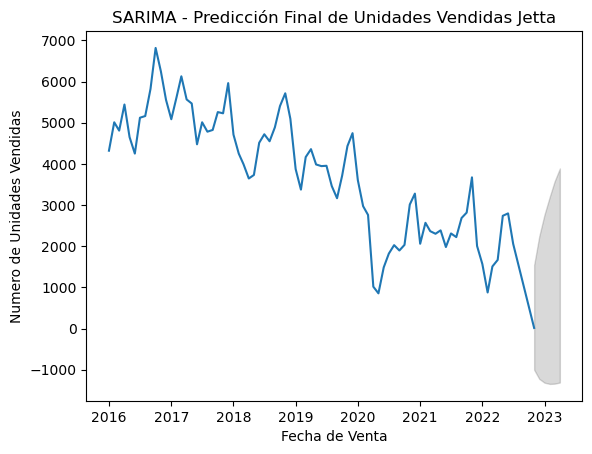

In [42]:
# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(ts_data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(ts_data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Predicción Final de Unidades Vendidas Jetta")
plt.ylabel("Numero de Unidades Vendidas")
plt.xlabel("Fecha de Venta")
plt.show()